# Plot data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
fs_data=pd.read_csv("fs_summary.csv")

In [3]:
fs_data.head(5)

,sample,n_rep,rf_mean,conc_mean,s_x,CI_low,CI_high,n_add
0,FS-15N-1,3,1.894745,0.429943,0.032616,0.362302,0.497584,3.75
1,FS-15N-2,3,1.496906,0.338468,0.032737,0.270575,0.406361,3.75
2,FS-15N-3,3,3.035858,0.692320,0.032417,0.625091,0.759548,3.75
3,FS-15N-4,3,8.154848,1.869330,0.034238,1.798324,1.940336,3.75
4,FS-15N-5,3,3.852337,0.880053,0.032412,0.812834,0.947272,3.75


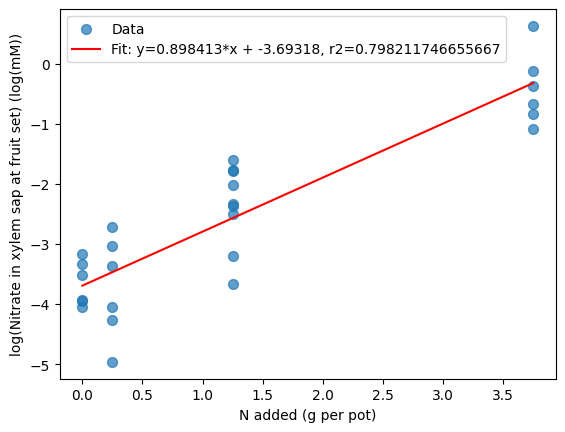

In [4]:
x=fs_data['n_add']
y=np.log(fs_data['conc_mean'])

slope,intercept,r,p,stderr=linregress(x,y)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit

plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit,y_fit, 'r-', label=f'Fit: y={slope:.6g}*x + {intercept:.6g}, r2={r**2}')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(Nitrate in xylem sap at fruit set) (log(mM))")
plt.legend()
plt.savefig("fruitset-linear.png")
plt.show()

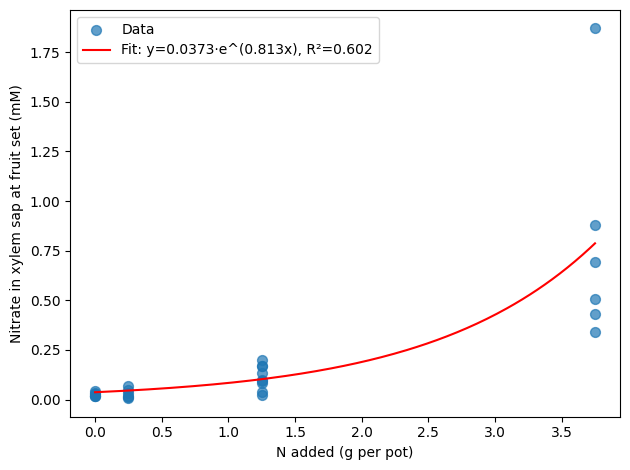

In [5]:
# define exponential model
def expo(x, a, b):
    return a * np.exp(b * x)

# filter to positive concentrations (log undefined for ≤0, and exp fits need >0)
mask = fs_data['conc_mean'] > 0
x = fs_data.loc[mask, 'n_add'].to_numpy()
y = fs_data.loc[mask, 'conc_mean'].to_numpy()

# initial guesses for parameters to help the optimizer
p0 = (y.min(), 0.05)

# fit exponential curve
popt, pcov = curve_fit(expo, x, y, p0=p0)
a, b = popt

# generate smooth x-values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = expo(x_fit, a, b)

residuals = y - expo(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

# plot data and fit
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.3g}·e^({b:.3g}x), R²={r2:.3f}')
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem sap at fruit set (mM)")
plt.legend()
plt.tight_layout()
plt.savefig("fruitset-exponential.png")
plt.show()

In [6]:
vern_data=pd.read_csv("vern_summary.csv")
veru_data=pd.read_csv("veru_summary.csv")

In [7]:
vern_data.head(5)

,sample,n_rep,rf_mean,conc_mean,s_x,CI_low,CI_high,n_add
0,V-15N-1,3,1.347076,0.304018,0.032790,0.236016,0.372019,3.75
1,V-15N-2,3,2.111994,0.479895,0.032561,0.412369,0.547422,3.75
2,V-15N-3,3,3.729934,0.851909,0.032406,0.784704,0.919114,3.75
3,V-15N-4,3,0.586650,0.129173,0.033114,0.060498,0.197847,3.75
4,V-15N-5,3,5.387625,1.233062,0.032714,1.165217,1.300906,3.75


In [8]:
veru_data.head(5)

,sample,n_rep,rf_mean,conc_mean,s_x,CI_low,CI_high,n_add
0,V-15NU-1,3,1.018655,0.228504,0.032918,0.160236,0.296772,3.75
1,V-15NU-2,3,1.559000,0.352745,0.032716,0.284896,0.420595,3.75
2,V-15NU-3,3,1.152898,0.259370,0.032863,0.191216,0.327525,3.75
3,V-15NU-4,3,1.298515,0.292852,0.032808,0.224813,0.360891,3.75
4,V-15NU-5,3,0.995920,0.223276,0.032928,0.154989,0.291564,3.75


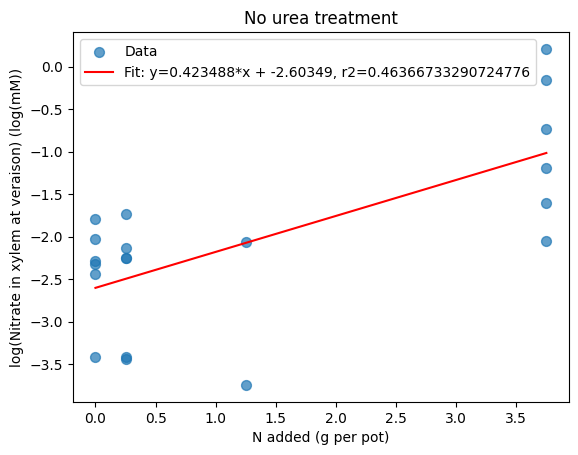

In [9]:
#We'll start by looking at the datasets separately before combining them

#Make sure we drop blanks
vern_data=vern_data.dropna()

x=vern_data['n_add']
y=np.log(vern_data['conc_mean'])

slope,intercept,r,p,stderr=linregress(x,y)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit

plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit,y_fit, 'r-', label=f'Fit: y={slope:.6g}*x + {intercept:.6g}, r2={r**2}')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(Nitrate in xylem at veraison) (log(mM))")
plt.title("No urea treatment")
plt.legend()
plt.savefig("veraison_nitrate-linear.png")
plt.show()

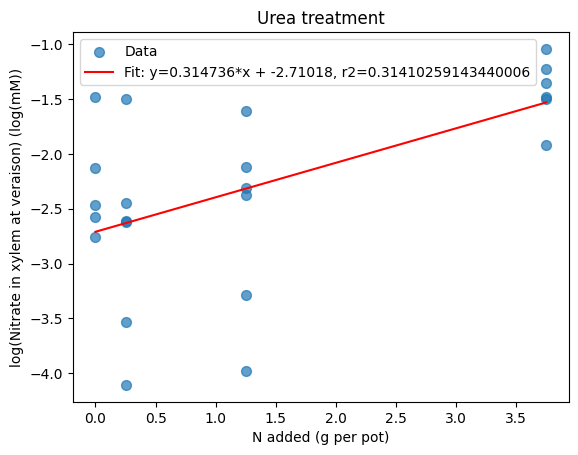

In [10]:
#Drop blanks
veru_data=veru_data.dropna()

x=veru_data['n_add']
y=np.log(veru_data['conc_mean'])

slope,intercept,r,p,stderr=linregress(x,y)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit

plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit,y_fit, 'r-', label=f'Fit: y={slope:.6g}*x + {intercept:.6g}, r2={r**2}')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(Nitrate in xylem at veraison) (log(mM))")
plt.title("Urea treatment")
plt.legend()
plt.savefig("veraison_urea-linear.png")
plt.show()

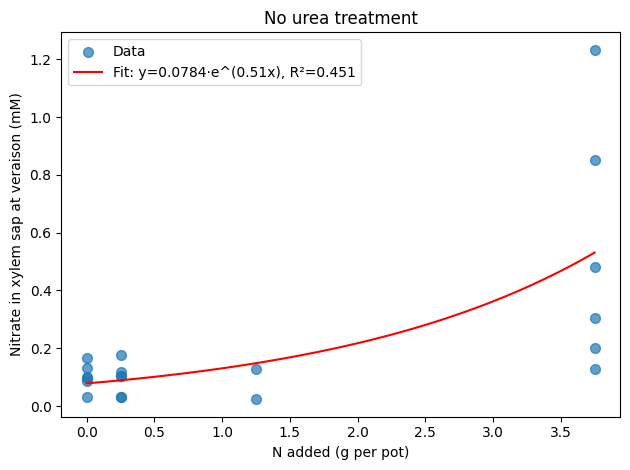

In [11]:
# define exponential model
def expo(x, a, b):
    return a * np.exp(b * x)

# filter to positive concentrations (log undefined for ≤0, and exp fits need >0)
mask = vern_data['conc_mean'] > 0
x = vern_data.loc[mask, 'n_add'].to_numpy()
y = vern_data.loc[mask, 'conc_mean'].to_numpy()

# initial guesses for parameters to help the optimizer
p0 = (y.min(), 0.05)

# fit exponential curve
popt, pcov = curve_fit(expo, x, y, p0=p0)
a, b = popt

# generate smooth x-values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = expo(x_fit, a, b)

residuals = y - expo(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

# plot data and fit
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.3g}·e^({b:.3g}x), R²={r2:.3f}')
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem sap at veraison (mM)")
plt.title("No urea treatment")
plt.legend()
plt.tight_layout()
plt.savefig("veraison_nitrate-exponential.png")
plt.show()

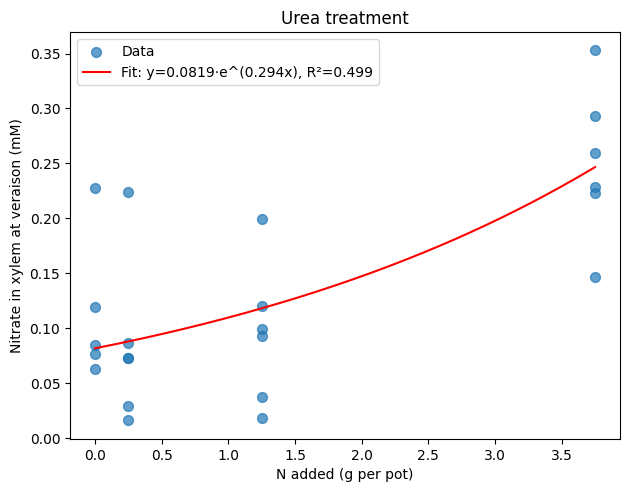

In [12]:
# define exponential model
def expo(x, a, b):
    return a * np.exp(b * x)

# filter to positive concentrations (log undefined for ≤0, and exp fits need >0)
mask = veru_data['conc_mean'] > 0
x = veru_data.loc[mask, 'n_add'].to_numpy()
y = veru_data.loc[mask, 'conc_mean'].to_numpy()

# initial guesses for parameters to help the optimizer
p0 = (y.min(), 0.05)

# fit exponential curve
popt, pcov = curve_fit(expo, x, y, p0=p0)
a, b = popt

# generate smooth x-values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = expo(x_fit, a, b)

residuals = y - expo(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

# plot data and fit
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.3g}·e^({b:.3g}x), R²={r2:.3f}')
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem at veraison (mM)")
plt.legend()
plt.tight_layout()
plt.title("Urea treatment")
plt.savefig("veraison_urea-exponential.png")
plt.show()